In [1]:
import pandas as pd

In [90]:
df = pd.read_csv("../data/mental_wellness.csv")

In [7]:
df.head(5)

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3,NaN
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2,NaN
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6,NaN
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0,NaN
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0,NaN


In [91]:
df = df.drop(["Unnamed: 15"],axis=1) #unexpected column drop

In [55]:
df.tail(5)

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
395,U0396,26,Female,Student,Remote,6.43,2.99,3.44,7.75,1,5.9,64.6,252,7.6,39.3
396,U0397,16,Male,Self-employed,Remote,9.59,5.44,4.15,5.57,1,10.0,47.4,99,7.0,3.5
397,U0398,40,Male,Student,Remote,8.72,2.36,6.36,7.56,1,9.4,57.3,193,10.1,6.6
398,U0399,29,Female,Retired,Hybrid,5.04,0.94,4.10,7.32,1,7.1,63.6,97,12.1,21.0
399,U0400,39,Female,Employed,Remote,8.86,3.82,5.04,6.55,1,10.0,41.4,88,9.8,8.4


In [56]:
df.shape

(400, 15)

In [57]:
df.info

<bound method DataFrame.info of     user_id  age  gender     occupation  work_mode  screen_time_hours  \
0     U0001   33  Female       Employed     Remote              10.79   
1     U0002   28  Female       Employed  In-person               7.40   
2     U0003   35  Female       Employed     Hybrid               9.78   
3     U0004   42    Male       Employed     Hybrid              11.13   
4     U0005   28    Male        Student     Remote              13.22   
..      ...  ...     ...            ...        ...                ...   
395   U0396   26  Female        Student     Remote               6.43   
396   U0397   16    Male  Self-employed     Remote               9.59   
397   U0398   40    Male        Student     Remote               8.72   
398   U0399   29  Female        Retired     Hybrid               5.04   
399   U0400   39  Female       Employed     Remote               8.86   

     work_screen_hours  leisure_screen_hours  sleep_hours  sleep_quality_1_5  \
0          

In [58]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [59]:
import matplotlib.pyplot as plt

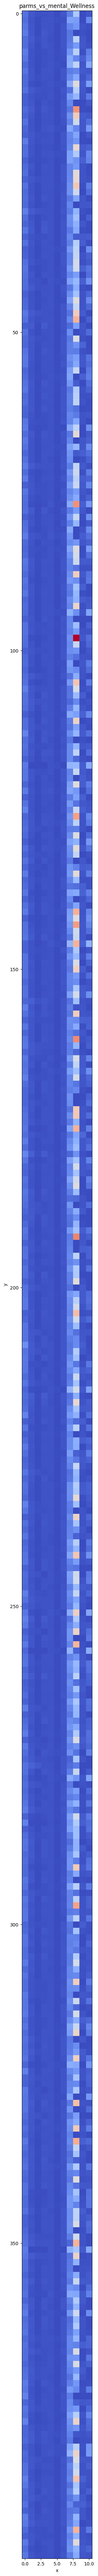

In [60]:
data = df.drop(["user_id","gender","occupation","work_mode"],axis=1).to_numpy()
plt.figure(figsize=(100,100))
plt.imshow(data,cmap='coolwarm')
plt.xlabel("x")
plt.ylabel("y")
plt.title("parms_vs_mental_Wellness")
plt.show()

In [84]:
from sklearn.preprocessing import LabelEncoder as le

In [92]:
encoder = le()
df["gender_encoded"] = encoder.fit_transform(df["gender"])
df["occupation_encoded"] = encoder.fit_transform(df["occupation"])
df["work_mode_encoded"] = encoder.fit_transform(df["work_mode"])
df = df.drop(["gender","occupation","work_mode","user_id"],axis=1)
df.head()

,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,gender_encoded,occupation_encoded,work_mode_encoded
0,33,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3,0,0,2
1,28,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2,0,0,1
2,35,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6,0,0,0
3,42,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0,1,0,0
4,28,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0,1,3,2


In [93]:
import seaborn as sns

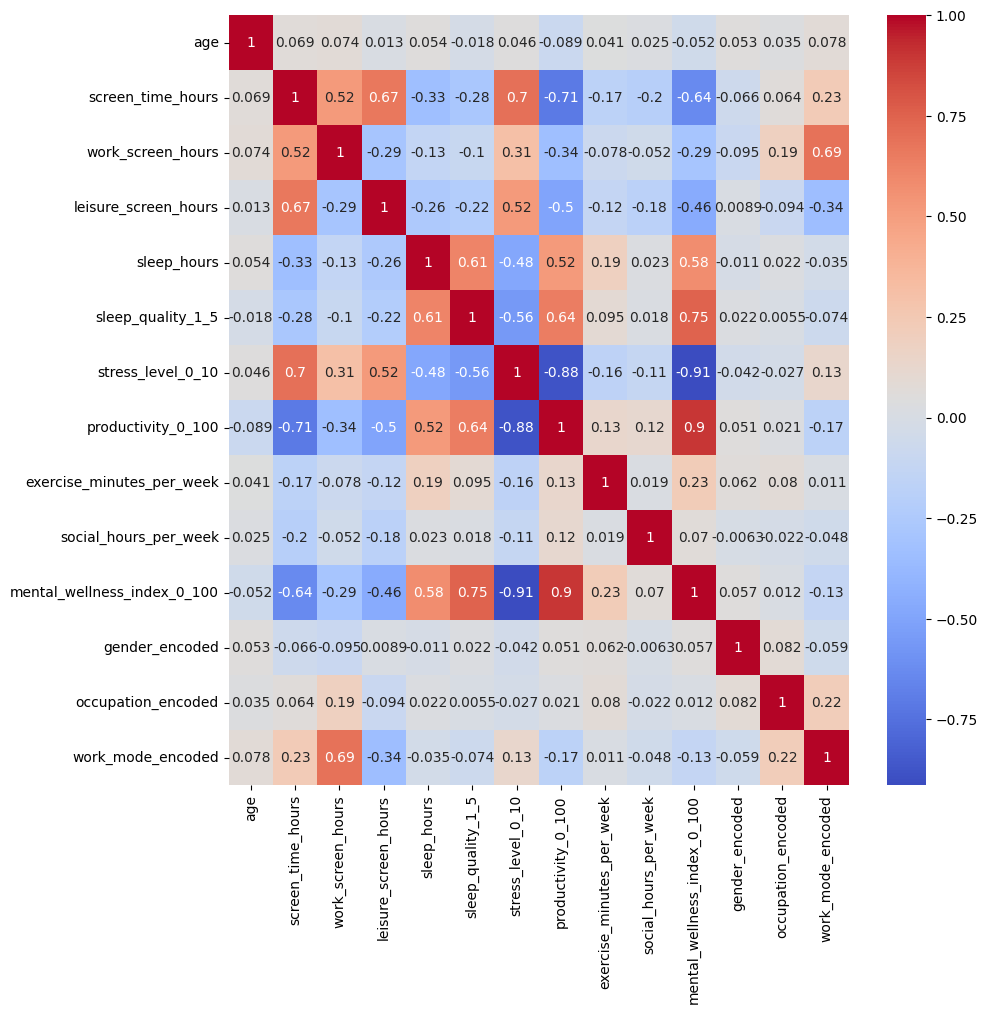

In [95]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

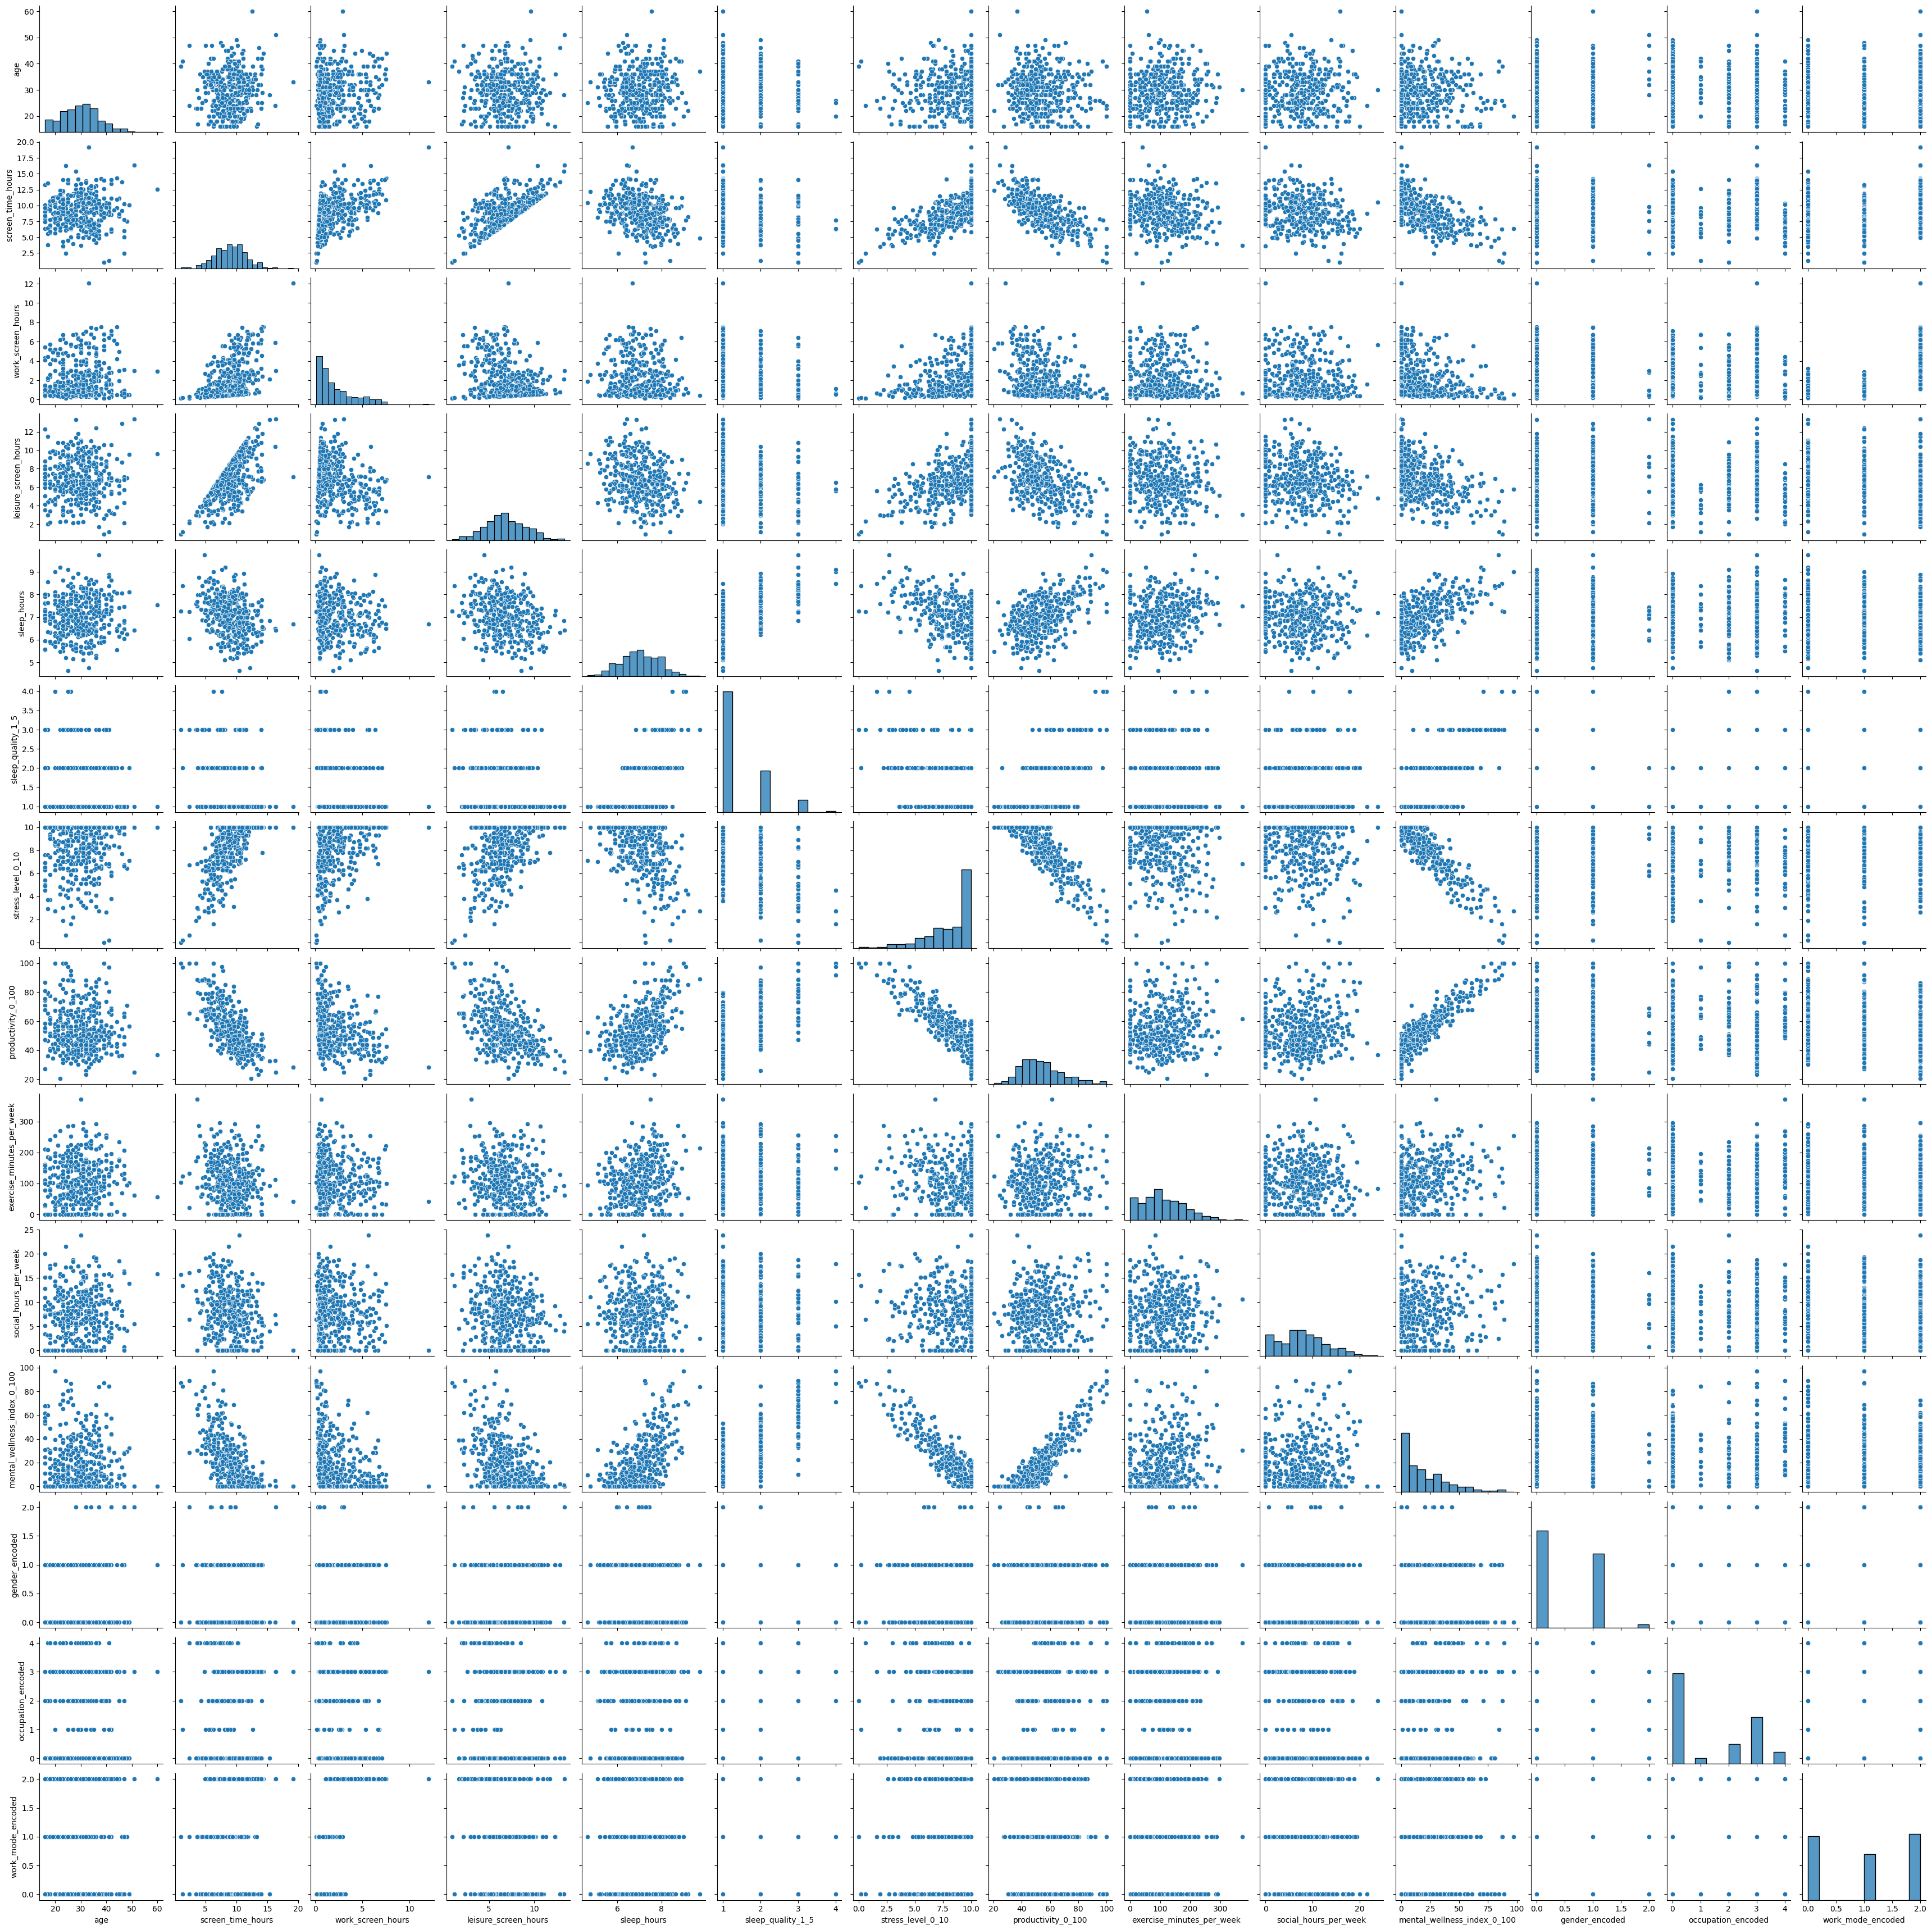

In [97]:
sns.pairplot(df)